# Lab Assignment 1 – The Fourier Transform

**Computer Vision** - Term 5, 2022

Instructor: Dr. Saumya Jetly <br>
TA: Ribhu Lahiri

*Deadline: Monday, 7 March 2022 11:59 pm* 

Submission form link: https://forms.gle/UowanRjZ3f8m5skr7

Total points: 5 (+1 extra credit)


### Part 1: Fast Fourier transformation of images (2 points)

In the first part of the assignment, you will create a backbone for the rest of it. Here, you need to create functions for the fast fourier transform, the inverse of that, a function to shift the zero-frequency componenet to the center of the spectrum, and an inverse for that as well.

**Note:** If you use pre-built functions there will be a slight deduction in grades

In [1]:
# Imports 
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading in a sample image
from PIL import Image

im = Image.open("/content/drive/MyDrive/TEST/Tester/cat.333.jpg")
print(np.asarray(im, dtype=float).shape)

im2 = Image.open("/content/drive/MyDrive/TEST/Tester/TesteraImage_190.jpg")
im2 = im2.resize((374,500),Image.ANTIALIAS)
print(np.asarray(im2, dtype=float).shape)

(374, 500, 3)
(500, 374, 3)


In [7]:
# Task 1.a: 
import math
import cmath
# np.vectorize(myfunc)(mymatrix)

def fft(image):
    ''' 
    Applies a fast fourier transform to the given image

    Parameters
    ----------
    image: PIL.Image or np.ndarray
        A PIL image object, or a numpy array representing the image

    Returns
    -------
    fft_image: np.ndarray
        A numpy array of the fft-transformed image

    '''
    # YOUR CODE HERE
    return np.fft.fft2(image)

    # n = len(image)
    # if n==1:
    #     return image
    # w = cmath.exp(2j*cmath.pi/n)
    # p1, p2 = image[::2], image[1::2]
    # y1, y2 = fft(p1), fft(p2)
    # y = [0]*n
    # for j in range(n//2):
    #     y[j] = y1[j]+(w**j)*y2[j]
    #     y[j+(n//2)] = y1[j]-(w**j)*y2[j]
    # return y


# Task 1.b:
def inv_fft(image):
    ''' 
    Inverts a fourier transformed image back to an image

    Parameters
    -----------
    image: np.ndarray
        An ff transformed image array

    Returns:
    -----------------------
    ifft_image: np.ndarray
        A numpy array of reconstructed image

    '''
    return np.fft.ifft2(image)
    #TODO: YOUR CODE HERE

    # f, M, N = fft(np.conj(image))
    # f = np.matrix(np.real(np.conj(f)))/(M*N)
    # return f[0:m, 0:n]

# Task 1.c:
def fft_shift(image):
    '''
    Shift the zero-frequency component to the center of the spectrum

    Parameters
    -----------
    image: np.ndarray
        An ff transformed image array

    Returns:
    -----------------------
    fft_shifted: np.ndarray
        A numpy array of shifted spectrum

    '''
    #TODO: YOUR CODE HERE

    return np.fft.fftshift(image)
    # M, N = image.shape
    # R1, R2 = image[0: M/2, 0: N/2], image[M/2: M, 0: N/2]
    # R3, R4 = image[0: M/2, N/2: N], image[M/2: M, N/2: N]
    # shift = np.zeros(image.shape,dtype = image.dtype)
    # shift[M/2: M, N/2: N], shift[0: M/2, 0: N/2] = R1, R4
    # shift[M/2: M, 0: N/2], shift[0: M/2, N/2: N]= R3, R2
    # return shift

# Task 1.d
def inv_fft_shift(image):
    '''
    Inverse the shift to decentralise origin

    Parameters
    -----------
    image: np.ndarray
        A shifted ff transformed image array

    Returns:
    -----------------------
    fft_shifted: np.ndarray
        A numpy array of decentralised spectrum

    '''
    #TODO: YOUR CODE HERE
    return np.fft.ifftshift(image)

In [8]:
# freqs = np.fft.fftfreq(9, d=1./9).reshape(3, 3)
# print(freqs)
# # https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html
# print(np.fft.fftshift(freqs, axes=(0,1)))
# # https://stackoverflow.com/questions/37507190/why-we-shift-zero-frequency-component-to-center-of-spectrum-of-an-image/37507510#:~:text=The%20zero%2Dfrequency%20is%20shifted,can%20derive%20before%20the%20shift.
# print(np.fft.fftshift(abs(np.fft.fft2(freqs))))

(<matplotlib.axes._subplots.AxesSubplot at 0x7fce042a1e10>,
 Text(0.5, 1.0, 'Processed Image'))

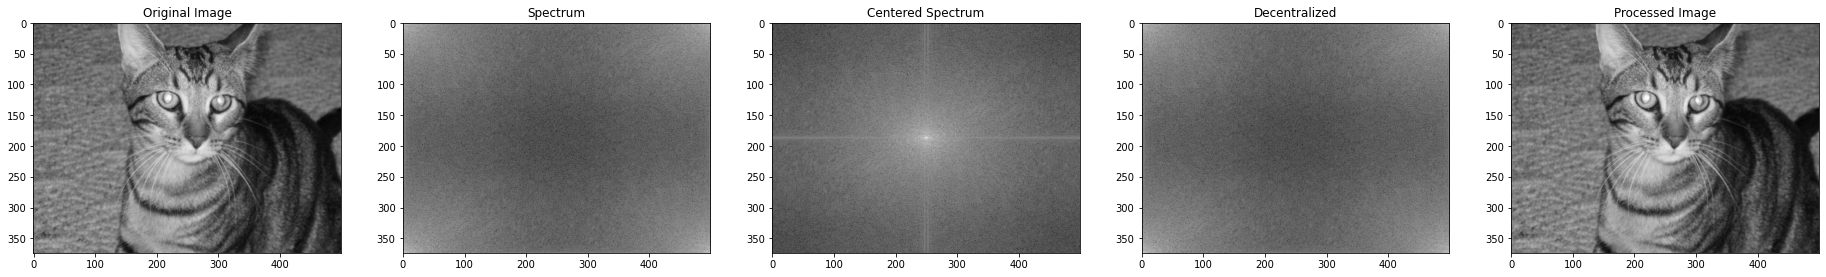

In [10]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("/content/drive/MyDrive/TEST/Tester/cat.333.jpg", 0) #TODO: Replace image here
# img = cv2.resize(img, (512,512))

img_fft = fft(img)
img_shift = fft_shift(img_fft)
img_inv_shift = inv_fft_shift(img_shift)
img_inv = inv_fft(img_inv_shift)

plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_fft)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_shift)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_inv_shift)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_inv), "gray"), plt.title("Processed Image")

### Part 2: Low pass and High pass filters (2 points)
In this second part you will create two basic filters, the Gaussian low pass and high pass filters. These will give you an intuition behind how filters can be applied in the FFT domain to modify images and extract certain features that can be useful.

Equations for reference:
1. Low Pass filter => $H(u,v) = e^{-D^2(u,v)/2D_0}$
2. High Pass filter => $H(u,v) = 1 - e^{-D^2(u,v)/2D_0}$

In [11]:
# Feel free to create any other helper functions
# distance D from origin 

def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Task 2.a:
def gaussian_low_pass(D, shape):
    '''
    Creates gaussian low pass filter for a given image

    Parameters
    -----------
    D: int
      A constant 
    
    shape: list or tuple
        The dimensions of the image (in 2D)

    Returns:
    -----------------------
    filter: np.ndarray
        A numpy array of the low pass filter

    '''
    # u, v is pixel number; M, N is the shape of the image.
    matrix = np.zeros((shape[0], shape[1]))
    for i in range(shape[0]):
        for j in range(shape[1]):
            value = math.exp(-(distance((i,j),(shape[0]//2,shape[1]//2))**2)/(2*D**2))
            matrix[i][j] = value
    return matrix
    # pass

# Task 2.b:
def gaussian_high_pass(D, shape):
    '''Creates gaussian high pass filter for a given image

    Parameters
    -----------
    D: int
      A constant 
    
    shape: list or tuple
        The dimensions of the image (in 2D)

    Returns:
    -----------------------
    filter: np.ndarray
        A numpy array of the high pass filter

    '''
    # pass
    return 1 - gaussian_low_pass(D, shape)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fce078325d0>,
 Text(0.5, 1.0, 'High Pass'))

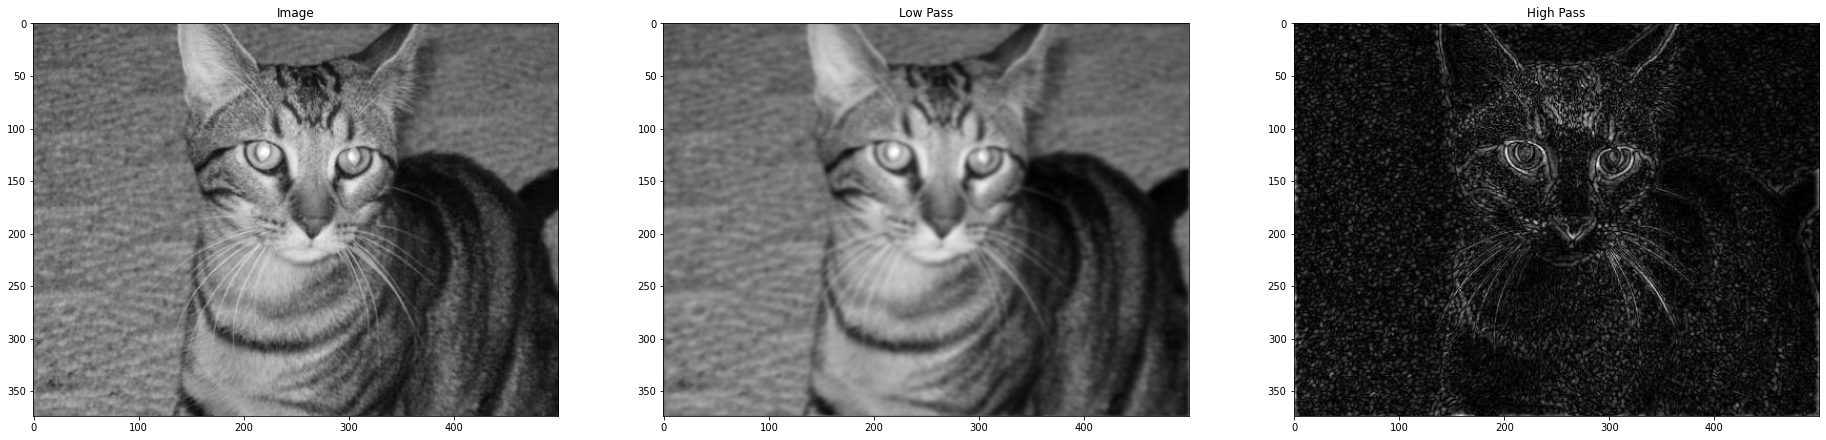

In [12]:
img = cv2.imread("/content/drive/MyDrive/TEST/Tester/cat.333.jpg", 0) #TODO: Replace image here
original = fft(img)
shifted = fft_shift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Image")

LPcenter = shifted * gaussian_low_pass(50, img.shape)
low_pass = inv_fft_shift(LPcenter)
inverse_low_pass = inv_fft(low_pass)
plt.subplot(132), plt.imshow(np.abs(inverse_low_pass), "gray"), plt.title("Low Pass")

HPcenter = shifted * gaussian_high_pass(25, img.shape)
high_pass = inv_fft_shift(HPcenter)
inverse_high_pass = inv_fft(high_pass)
plt.subplot(133), plt.imshow(np.abs(inverse_high_pass), "gray"), plt.title("High Pass")

### Part 3: Filters in the FFT domain (1 point)
In the third part, we apply more filters but this time, we compare them to filters applied in the Image's original spatial domain itself. This should help you to understand the connection between information in the spatial domain and in the frequency domain, and how FFT helps to work between the two.

The task is to play around with the given filters and come up with 2 novel filters, 1 in each domain.

In [13]:
def mask_filter(mask, image):
    '''
    Filters the image using the mask and returns it

    Parameters
    -----------
    mask: np.ndarray
      The mask 
    
    image: np.ndarray
        The image

    Returns:
    -----------------------
    filtered_image: np.ndarray
        The image with the filter applied

    '''
    return mask * image

(<matplotlib.axes._subplots.AxesSubplot at 0x7fce0403dc50>,
 Text(0.5, 1.0, 'Transformed Image'))

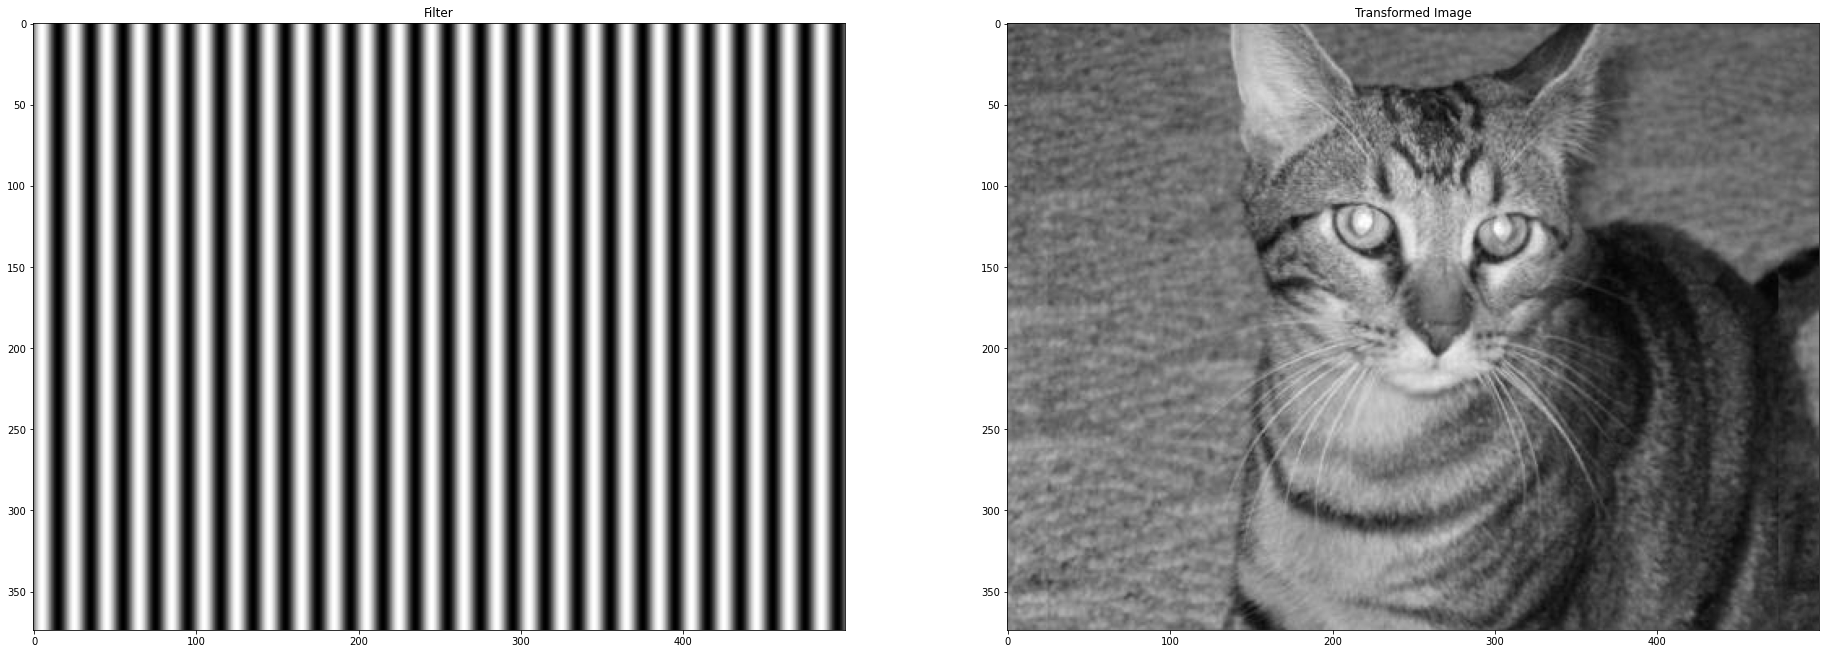

In [14]:
x = np.arange(shifted.shape[1])  # generate 1-D sine wave of required period 
y = np.sin(2 * np.pi * x / 20)

y += max(y)

mask = np.array([[y[j]*127 for j in range(shifted.shape[1])] for i in range(shifted.shape[0])], dtype=np.uint8)

masked = mask_filter(mask, shifted)
inv_mask = inv_fft_shift(masked)
invert = inv_fft(inv_mask)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(121), plt.imshow(mask, "gray"), plt.title("Filter")
plt.subplot(122), plt.imshow(np.abs(invert), "gray"), plt.title("Transformed Image")

(<matplotlib.axes._subplots.AxesSubplot at 0x7fce03e3ee90>,
 Text(0.5, 1.0, 'Transformed Image'))

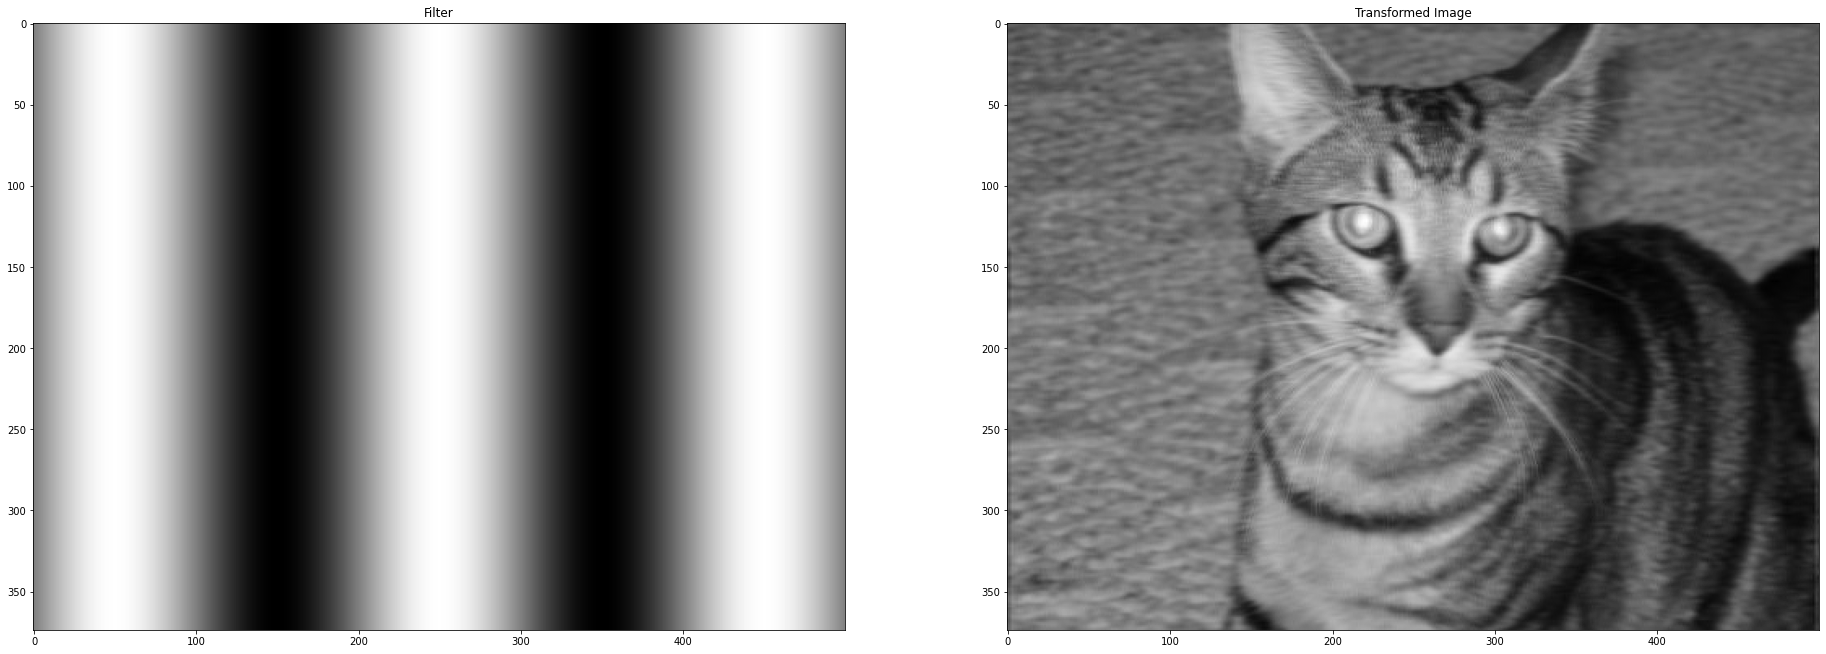

In [15]:
x = np.arange(shifted.shape[1])  # generate 1-D sine wave of required period 
y = np.sin(np.pi * x / 100)

y += max(y)

mask = np.array([[y[j]*127 for j in range(shifted.shape[1])] for i in range(shifted.shape[0])], dtype=np.uint8)

masked = mask_filter(mask, shifted)
inv_mask = inv_fft_shift(masked)
invert = inv_fft(inv_mask)
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(121), plt.imshow(mask, "gray"), plt.title("Filter")
plt.subplot(122), plt.imshow(np.abs(invert), "gray"), plt.title("Transformed Image")

In [16]:
mask = np.ones(img.shape)

for i in range(img.shape[0]):
  for j in range(0,img.shape[1],5):
    mask[i][j] = 0

filter_img = mask_filter(mask, img)
fft_filtered_img = fft(filter_img)
fft_filtered = fft_shift(fft_filtered_img)

fft_img = fft(img)
fft_center = fft_shift(fft_img)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(221), plt.imshow(np.abs(img), 'gray'), plt.title('Original Image')
plt.subplot(222), plt.imshow(np.abs(filter_img), 'gray'), plt.title('Filtered Image')
plt.subplot(223), plt.imshow(np.log(1+np.abs(fft_center)), 'gray')
plt.subplot(224), plt.imshow(np.log(1+np.abs(fft_filtered)), 'gray')

Output hidden; open in https://colab.research.google.com to view.

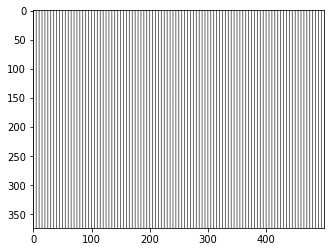

In [17]:
plt.imshow(mask, 'gray')

In [18]:
mask = np.ones(img.shape)

for size in range(4):
  for i in range(size, img.shape[0], 5):
    for j in range(size,img.shape[1],5):
      mask[i][j] = 0

filter_img = mask_filter(mask, img)
fft_filtered_img = fft(filter_img)
fft_filtered = fft_shift(fft_filtered_img)

fft_img = fft(img)
fft_center = fft_shift(fft_img)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(221), plt.imshow(np.abs(img), 'gray'), plt.title('Original Image')
plt.subplot(222), plt.imshow(np.abs(filter_img), 'gray'), plt.title('Filtered Image')
plt.subplot(223), plt.imshow(np.log(1+np.abs(fft_center)), 'gray')
plt.subplot(224), plt.imshow(np.log(1+np.abs(fft_filtered)), 'gray')

Output hidden; open in https://colab.research.google.com to view.

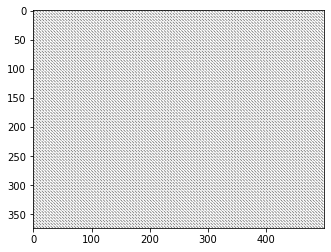

In [19]:
plt.imshow(mask, 'gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fce061d3a50>,
 Text(0.5, 1.0, 'Transformed Image'))

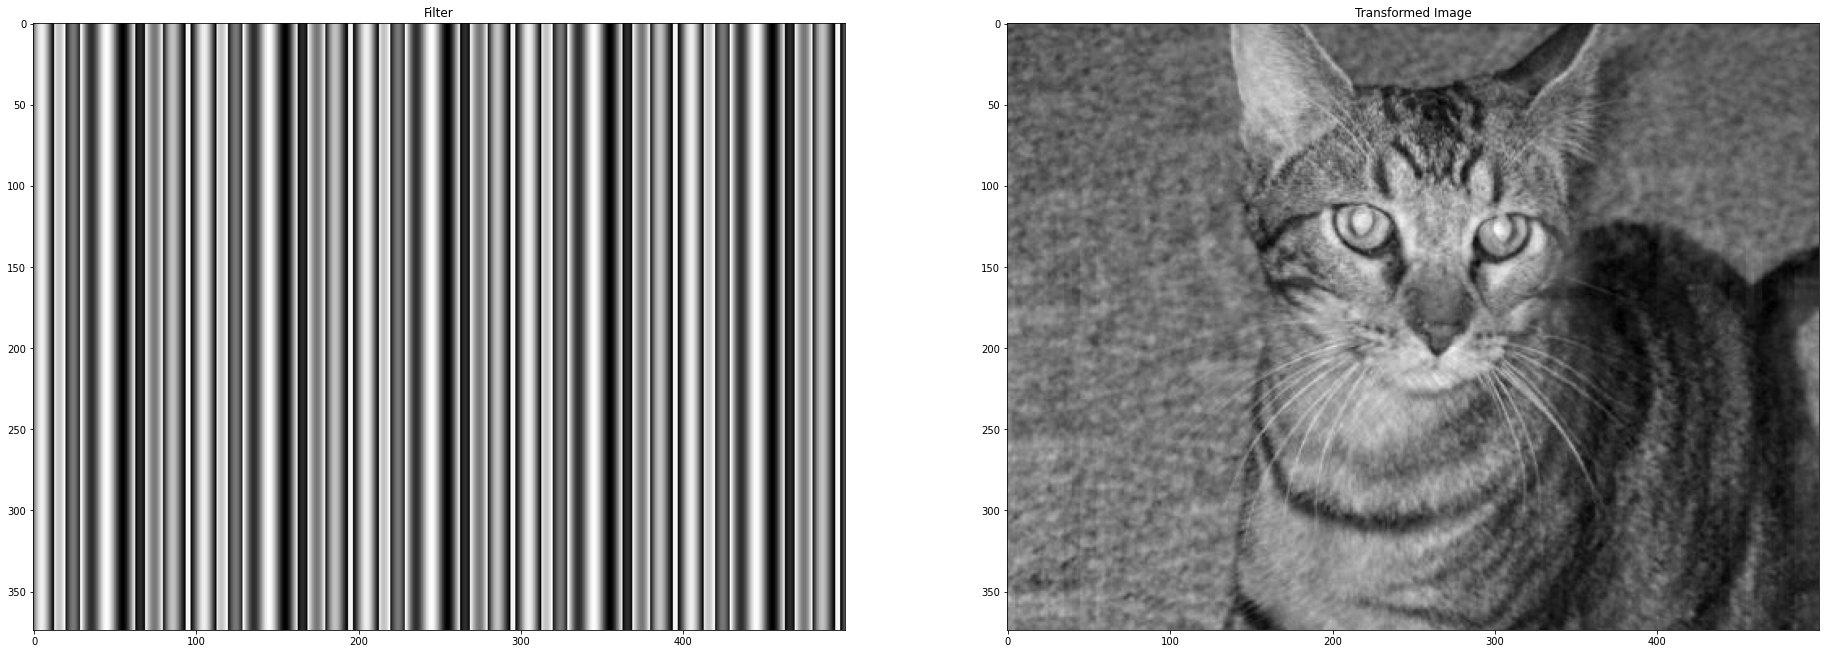

In [20]:
# TODO: YOUR CODE HERE

# I will create two filters, one for the sine domain, and other with ones
# Sarthak filter 2

x = np.arange(shifted.shape[1])  # generate 1-D sine wave of required period 
y = np.sin(2 * np.pi * x / 20) + np.cos(2 * np.pi * x / 100) 

y += max(y)

mask = np.array([[y[j]*127 for j in range(shifted.shape[1])] for i in range(shifted.shape[0])], dtype=np.uint8)

masked = mask_filter(mask, shifted)
inv_mask = inv_fft_shift(masked)
invert = inv_fft(inv_mask)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(121), plt.imshow(mask, "gray"), plt.title("Filter")
plt.subplot(122), plt.imshow(np.abs(invert), "gray"), plt.title("Transformed Image")

In [21]:
# Sarthak filter 2

mask = np.ones(img.shape)

for size in range(2,28,3):
    # use random?
  for i in range(size, img.shape[0], 5):
    for j in range(size,img.shape[1], 5):
      mask[i][j] = 0

filter_img = mask_filter(mask, img)
fft_filtered_img = fft(filter_img)
fft_filtered = fft_shift(fft_filtered_img)

fft_img = fft(img)
fft_center = fft_shift(fft_img)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(221), plt.imshow(np.abs(img), 'gray'), plt.title('Original Image')
plt.subplot(222), plt.imshow(np.abs(filter_img), 'gray'), plt.title('Filtered Image')
plt.subplot(223), plt.imshow(np.log(1+np.abs(fft_center)), 'gray')
plt.subplot(224), plt.imshow(np.log(1+np.abs(fft_filtered)), 'gray')

Output hidden; open in https://colab.research.google.com to view.

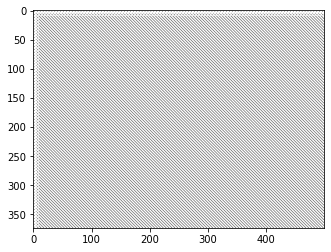

In [22]:
plt.imshow(mask, 'gray')

### Part 4: Construction of Hybrid Images [Optional] (1 Point)

As an optional part, you can try to replicate the results from Oliva et al's Hybrid Images paper (https://stanford.edu/class/ee367/reading/OlivaTorralb_Hybrid_Siggraph06.pdf), as discussed in the class.

HINT: You already have the building blocks for it in the functions above.

In [23]:
# Task 3:
def create_hybrid_image(lp_image, hp_image):
    '''
    Creates a hybrid image combining low pass features from one image
    with high pass features from the other

    Parameters
    -----------
    lp_image: np.ndarray
      FF transformed image whose low pass features are to be combined
    
    hp_image: np.ndarray
      FF transformed image whose high pass features are to be combined

    Returns:
    -----------------------
    hybrid_image: np.ndarray
        A numpy array of the combined high pass and low pass image

    '''
    # TODO: YOUR CODE HERE
    shape = lp_image.shape
    
    lp = fft_shift(lp_image) * gaussian_low_pass(150, shape)
    hp = fft_shift(hp_image) * gaussian_high_pass(10, shape)

    lp_img = np.abs(inv_fft(inv_fft_shift(lp)))
    hp_img = np.abs(inv_fft(inv_fft_shift(hp)))

    # H = I1 · G1 + I2 ·(1 − G2)
    image = lp_img + hp_img
    return image


(<matplotlib.axes._subplots.AxesSubplot at 0x7fce0379de90>,
 Text(0.5, 1.0, 'Hybrid Image'))

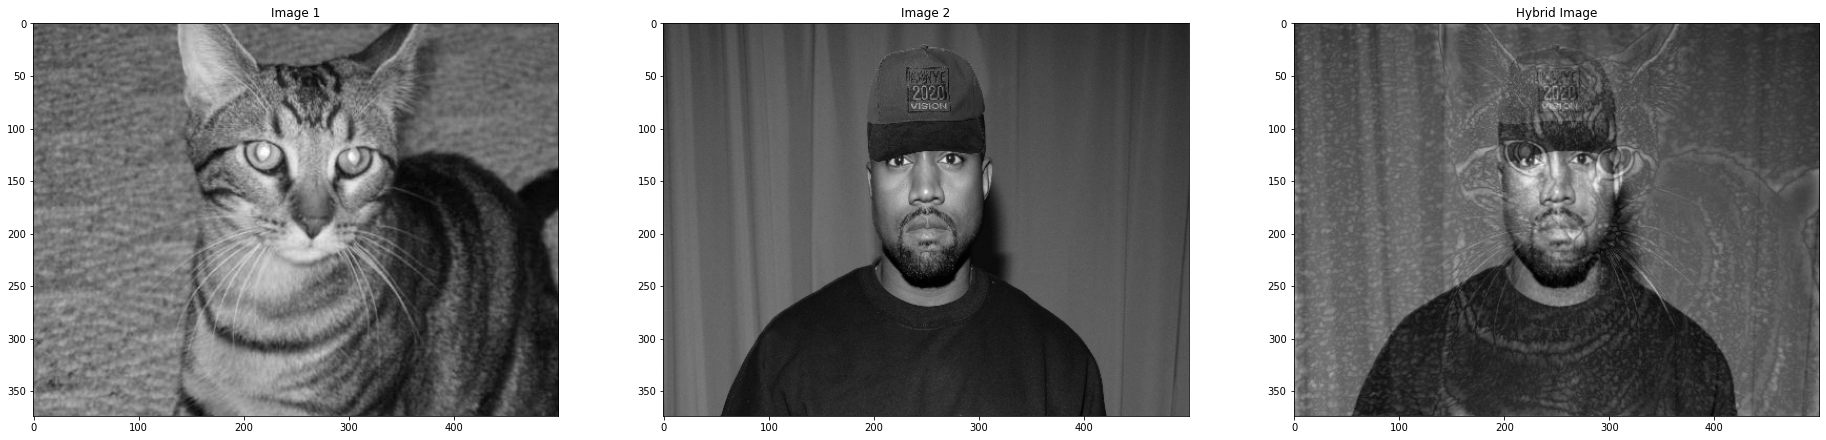

In [24]:
img1 = cv2.imread('/content/drive/MyDrive/TEST/Tester/cat.333.jpg', 0)
img2 = cv2.imread('/content/drive/MyDrive/TEST/Tester/TesteraImage_190.jpg', 0)
img2 = cv2.resize(img2, (500,374))

orig1 = np.fft.fft2(img1)
orig2 = np.fft.fft2(img2)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img1, "gray"), plt.title("Image 1")
plt.subplot(132), plt.imshow(img2, "gray"), plt.title("Image 2")
plt.subplot(133), plt.imshow(create_hybrid_image(orig2, orig1), "gray"), plt.title("Hybrid Image")